In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml

import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters

% matplotlib inline

In [2]:
dbname = 'testData/testsources.db'

In [3]:
con = sql.connect(dbname)

In [4]:
full = pd.read_sql_query("""
SELECT * FROM testsources
""", con)

In [5]:
full

,diaid,obshistid,ssmid,ra,dec,mjd,mag,snr
0,0,0,1,220.643549,-21.965527,59580.16,15.181889,5
1,1,1,1,220.659667,-21.970416,59580.20,15.181976,5
2,2,2,1,221.042042,-22.085481,59581.16,15.184020,5
3,3,3,1,221.058056,-22.090310,59581.20,15.184099,5
4,4,4,1,221.437935,-22.203902,59582.16,15.185958,5
5,5,5,1,221.453842,-22.208670,59582.20,15.186030,5
6,6,6,1,221.831176,-22.320788,59583.16,15.187702,5
7,7,7,1,221.846974,-22.325496,59583.20,15.187766,5
8,8,8,1,222.221714,-22.436138,59584.16,15.189252,5
9,9,9,1,222.237402,-22.440785,59584.20,15.189308,5


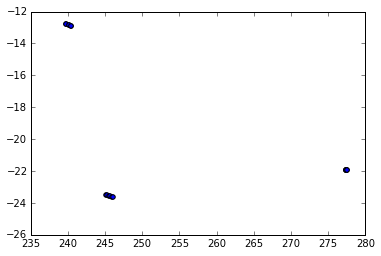

In [6]:
fig, ax = plt.subplots(1,1)
ax.scatter(np.array(full.ra), np.array(full.dec));
fig.savefig("full.jpg")

In [7]:
ssmids = pd.read_sql_query("""
SELECT DISTINCT ssmid FROM testsources
""", con)

In [8]:
len(ssmids['ssmid'])

3

In [9]:
num_ssm = random.sample(ssmids['ssmid'], 1)
sample = ""
for i in num_ssm:
    sample += str(i) + ', '
    
sample = '(' + sample[0:-2] + ')'

In [10]:
sample = ("(2)")

In [11]:
objs = pd.read_sql_query("""
SELECT * FROM testsources
WHERE ssmid IN %s
""" % (sample), con)

In [12]:
objs

,diaid,obshistid,ssmid,ra,dec,mjd,mag,snr
0,6,0,2,239.776045,-12.785856,54466.000000,25.484897,5
1,7,1,2,239.790793,-12.788275,54466.041667,25.484908,5
2,8,2,2,240.126284,-12.843637,54467.000000,25.484925,5
3,9,3,2,240.140997,-12.846006,54467.041667,25.484929,5
4,10,4,2,240.475672,-12.900223,54468.000000,25.484804,5
5,11,5,2,240.490350,-12.902542,54468.041667,25.484802,5


In [13]:
objs.to_csv("sample.txt", sep=" ", header=False, index=False)

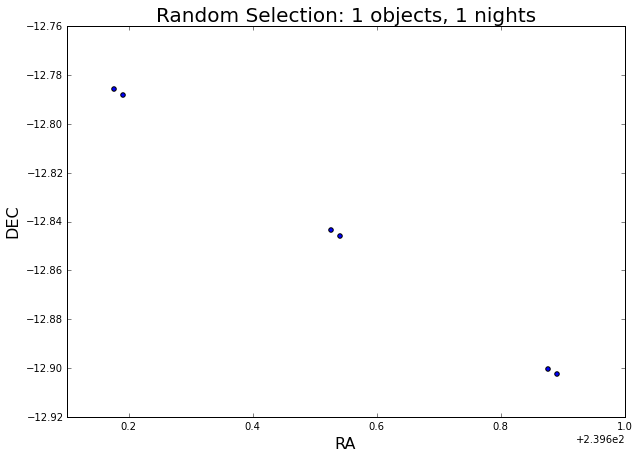

In [14]:
MopsPlotter.plotData(objs)

In [15]:
! rm -rf nightly/
! rm -rf obshist/
! mkdir nightly
! mkdir obshist

In [16]:
! python $MOPS_DIR/bin/splitByNight.py sample.txt nightly obshist

In [17]:
! rm -rf run/

In [18]:
! python ../runMops.py nightly run -vM 0.5

------- Run MOPS -------
Running LSST's Moving Object Pipeline

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets ----
	Remove subsets:                           True
	Keep only longest:                        True
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	 Detection error threshold:               0.0004
	 Maximum right ascension acceler

In [19]:
parameters = yaml.load(file('/Users/joachim/repos/neosim/unittest/run/parameters.yaml','r'))
tracker = yaml.load(file('/Users/joachim/repos/neosim/unittest/run/tracker.yaml','r'))

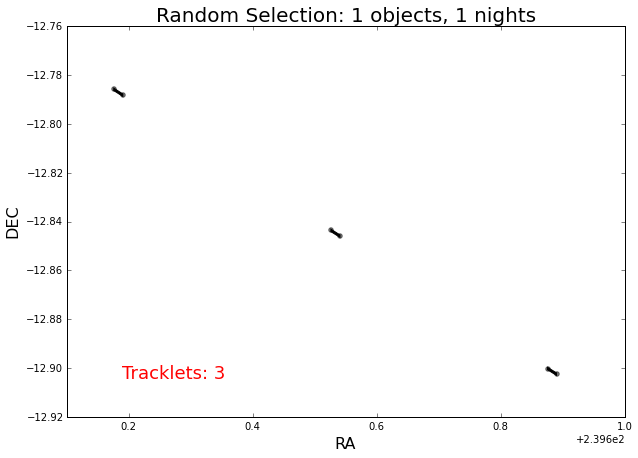

In [20]:
MopsPlotter.plotTracklets(tracker.tracklets, objs)

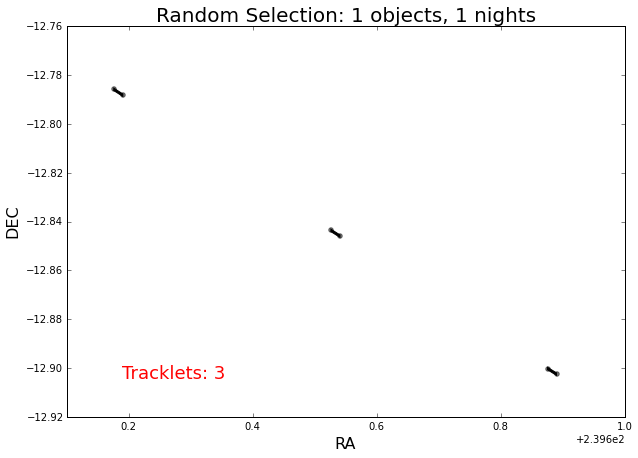

In [21]:
MopsPlotter.plotTracklets(tracker.collapsedTrackletsById, objs)

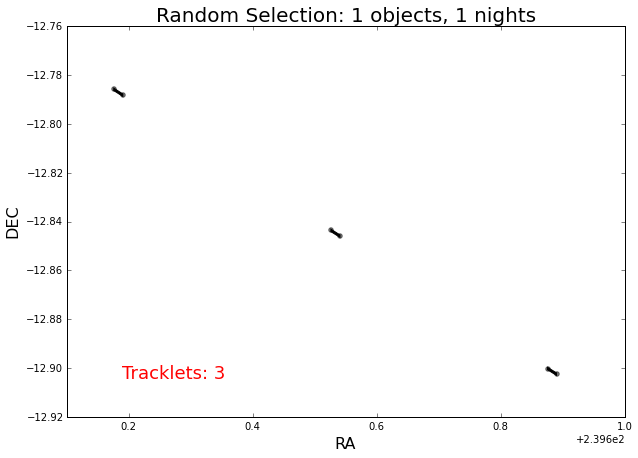

In [22]:
MopsPlotter.plotTracklets(tracker.purifiedTrackletsById, objs)

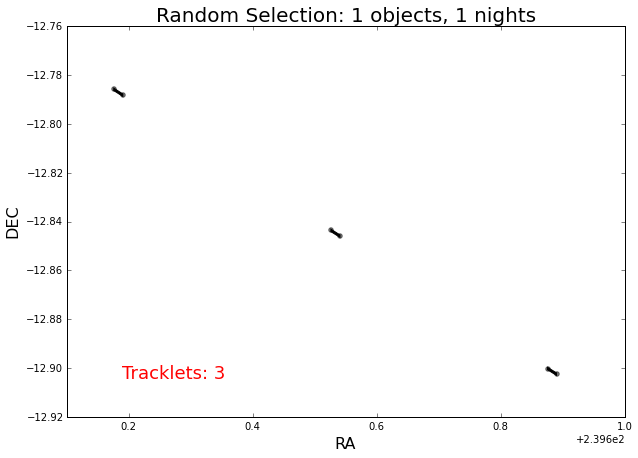

In [23]:
MopsPlotter.plotTracklets(tracker.finalTrackletsById, objs)

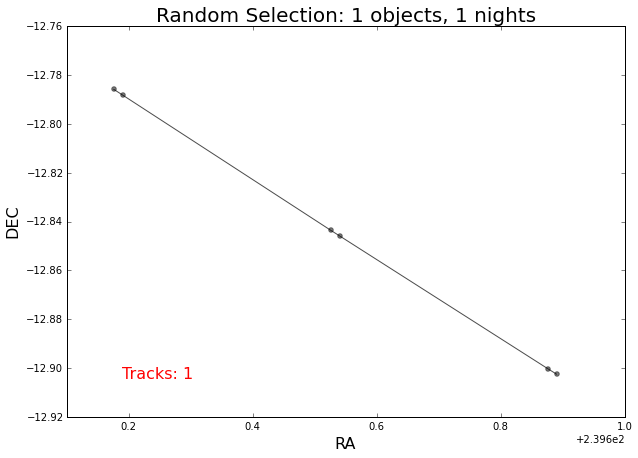

In [24]:
MopsPlotter.plotTracks(tracker.tracks, objs)